In [67]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [23]:
df = pd.read_csv("state_of_the_data_dataset.csv")

df.head()

0.a_token  0.d_data/hora_envio  1.a_idade  \
0  reb94rv0msth7q4nreb94riaq80iz3yi  16/10/2024 11:19:17         18   
1  1zc66g69jjt49y32l1zc66g8wqj79m4e  16/10/2024 20:45:31         18   
2  uu99wmam4n5kc2uu99wmydf0rk7l58f7  17/10/2024 18:10:59         18   
3  3ynsw7z0hl5hhpbfvaeqk73ynsw7z04l  22/10/2024 18:03:00         18   
4  v6bji2ct5xckpl1uouv6bjiotkrf3b4f  23/10/2024 01:33:23         18   

  1.a.1_faixa_idade 1.b_genero 1.c_cor/raca/etnia 1.d_pcd  \
0             17-21  Masculino             Branca     N√£o   
1             17-21  Masculino             Branca     N√£o   
2             17-21  Masculino              Parda     N√£o   
3             17-21  Masculino             Branca     N√£o   
4             17-21  Masculino             Branca     N√£o   

            1.e_experiencia_profissional_prejudicada  \
0                                                NaN   
1                                                NaN   
2  N√£o acredito que minha experi√™ncia profissiona...   
3                                                NaN   
4                                                NaN   

   1.e.1_N√£o acredito que minha experi√™ncia profissional seja afetada  \
0                                                NaN                    
1                                                NaN                    
2                                                1.0                    
3                                                NaN                    
4                                                NaN                    

   1.e.2_Sim, devido a minha Cor/Ra√ßa/Etnia  ...  \
0                                       NaN  ...   
1                                       NaN  ...   
2                                       0.0  ...   
3                                       NaN  ...   
4                                       NaN  ...   

   8.d.3_Entrando em contato com os times de neg√≥cio para defini√ß√£o do problema, identificar a solu√ß√£o e apresenta√ß√£o de resultados.  \
0                                                NaN                                                                                   
1                                                NaN                                                                                   
2                                                NaN                                                                                   
3                                                NaN                                                                                   
4                                                NaN                                                                                   

   8.d.4_Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produ√ß√£o em sistemas (produtos de dados).  \
0                                                NaN                                                                        
1                                                NaN                                                                        
2                                                NaN                                                                        
3                                                NaN                                                                        
4                                                NaN                                                                        

  8.d.5_Colocando modelos em produ√ß√£o, criando os pipelines de dados, APIs de consumo e monitoramento.  \
0                                                NaN                                                     
1                                                NaN                                                     
2                                                NaN                                                     
3                                                NaN                                                     
4                       

Definimos **oito quasi-identificadores**. S√£o eles:

In [48]:
quasi_identifiers = [
    '1.i.1_uf_onde_mora',
    '2.i_tempo_de_experiencia_em_dados',
    '2.j_tempo_de_experiencia_em_ti',
    '1.l_nivel_de_ensino',
    '1.m_√°rea_de_forma√ß√£o',
    '1.b_genero',
    '2.f_cargo_atual',
    '2.b_setor',
    '2.c_numero_de_funcionarios'
]

for col in quasi_identifiers:
    print(df[col].unique())
    print("\n")

['RS' 'SC' 'SP' 'DF' 'MA' 'BA' 'MG' 'PR' 'MT' 'GO' 'AL' 'PB' 'PE' 'RJ'
 'ES' 'AP' 'CE' 'TO' 'PI' 'MS' 'RN' 'AM' nan 'RO' 'SE' 'PA']


['de 1 a 2 anos' 'Menos de 1 ano' 'N√£o tenho experi√™ncia na √°rea de dados'
 nan 'de 5 a 6 anos' 'de 3 a 4 anos' 'de 7 a 10 anos' 'Mais de 10 anos']


['de 1 a 2 anos' 'Menos de 1 ano'
 'N√£o tive experi√™ncia na √°rea de TI/Engenharia de Software antes de come√ßar a trabalhar na √°rea de dados'
 nan 'de 3 a 4 anos' 'de 5 a 6 anos' 'de 7 a 10 anos' 'Mais de 10 anos']


['Estudante de Gradua√ß√£o' 'Gradua√ß√£o/Bacharelado'
 'N√£o tenho gradua√ß√£o formal' 'Prefiro n√£o informar' 'P√≥s-gradua√ß√£o'
 'Doutorado ou Phd' 'Mestrado']


['Computa√ß√£o / Engenharia de Software / Sistemas de Informa√ß√£o/ TI'
 'Economia/ Administra√ß√£o / Contabilidade / Finan√ßas/ Neg√≥cios' nan
 'Estat√≠stica/ Matem√°tica / Matem√°tica Computacional/ Ci√™ncias Atuariais'
 'Outra op√ß√£o'
 'Outras Engenharias (n√£o incluir engenharia de software ou TI)'
 'Ci√™ncias Biol√≥gicas

Esses atributos foram escolhidos porque podem ser extra√≠dos com alto grau de precis√£o a partir de um scraping de perfis no LinkedIn. Assim, representam atributos de alto risco para reidentifica√ß√£o.

## Premissa Geral

Estamos considerando que **√© razo√°vel assumir que os perfis do LinkedIn coletados correspondem a indiv√≠duos presentes no dataset *State-of-the-Data***. Essa suposi√ß√£o se fundamenta no fato de que os perfis foram extra√≠dos a partir de intera√ß√µes (como curtidas) em posts de divulga√ß√£o da pr√≥pria pesquisa ‚Äî posts que explicitamente convidavam profissionais da √°rea de dados a respond√™-la.

Embora n√£o seja poss√≠vel garantir com certeza absoluta que todos esses indiv√≠duos efetivamente participaram da pesquisa, essa hip√≥tese √© razo√°vel o suficiente para fins de an√°lise. Com base nela, adotamos o seguinte racioc√≠nio:

> **Se existe uma classe de equival√™ncia de tamanho 1 formada por um conjunto de quasi-identificadores que tamb√©m est√£o presentes no perfil de um indiv√≠duo do LinkedIn, ent√£o √© razo√°vel assumir que sabemos quem √© aquela pessoa no dataset.**


## Perguntas a serem respondidas

> **Esses oito quasi-identificadores s√£o suficientes para identificar unicamente indiv√≠duos do dataset?**

Para isso, vamos agrupar os registros utilizando os oito quasi-identificadores e observar a distribui√ß√£o do tamanho das classes de equival√™ncia. Se houver muitas classes com tamanho 1, isso indica uma alta capacidade de reidentifica√ß√£o ‚Äî o que compromete o anonimato.
* **√â necess√°rio usar todos os oito?**
* **Qual o menor subconjunto que j√° gera pelo menos uma classe de equival√™ncia de tamanho 1?**
* **Como varia o risco de reidentifica√ß√£o conforme aumentamos o n√∫mero de quasi-identificadores utilizados?**



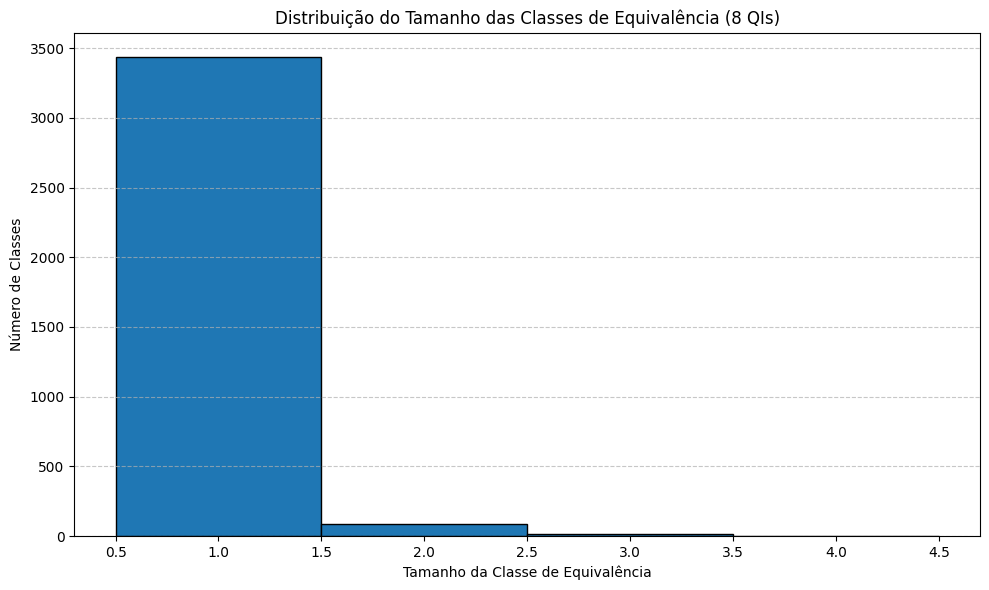

N√∫mero de classes de equival√™ncia com tamanho 1: 3437
N√∫mero de classes de equival√™ncia com tamanho 2: 87
N√∫mero de classes de equival√™ncia com tamanho 3: 15
Total de classes de equival√™ncia: 3540


In [30]:
grupos = df.groupby(quasi_identifiers).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
plt.hist(grupos['count'], bins=range(1, grupos['count'].max() + 2), edgecolor='black', align='left')
plt.title('Distribui√ß√£o do Tamanho das Classes de Equival√™ncia (8 QIs)')
plt.xlabel('Tamanho da Classe de Equival√™ncia')
plt.ylabel('N√∫mero de Classes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

num_grupos_tam_1 = (grupos['count'] == 1).sum()
num_grupos_tam_2 = (grupos['count'] == 2).sum()
num_grupos_tam_3 = (grupos['count'] == 3).sum()
total_grupos = len(grupos)
print(f'N√∫mero de classes de equival√™ncia com tamanho 1: {num_grupos_tam_1}')
print(f'N√∫mero de classes de equival√™ncia com tamanho 2: {num_grupos_tam_2}')
print(f'N√∫mero de classes de equival√™ncia com tamanho 3: {num_grupos_tam_3}')
print(f'Total de classes de equival√™ncia: {total_grupos}')


Ao utilizar os oito quasi-identificadores, obtemos 3.437 classes de equival√™ncia com tamanho 1, em um total de 5.217 registros. Ademais, tempos apenas 87 classes de equival√™ncia de tamanho 2 e 15 de tamanho 3. Isso √© um forte ind√≠cio de que esses identificadores, em conjunto, s√£o suficientes para possibilitar a reidentifica√ß√£o de indiv√≠duos.

No entanto, dois dos atributos utilizados ‚Äî tempo de experi√™ncia em dados e tempo de experi√™ncia em TI ‚Äî n√£o s√£o completamente confi√°veis a partir de perfis do LinkedIn, pois dependem da forma como a pessoa descreve sua trajet√≥ria profissional e podem estar sujeitos a omiss√µes ou interpreta√ß√µes diferentes.

Diante disso, surge a pr√≥xima pergunta:

> Se retirarmos esses dois campos, ainda assim conseguimos formar classes de equival√™ncia com tamanho 1?

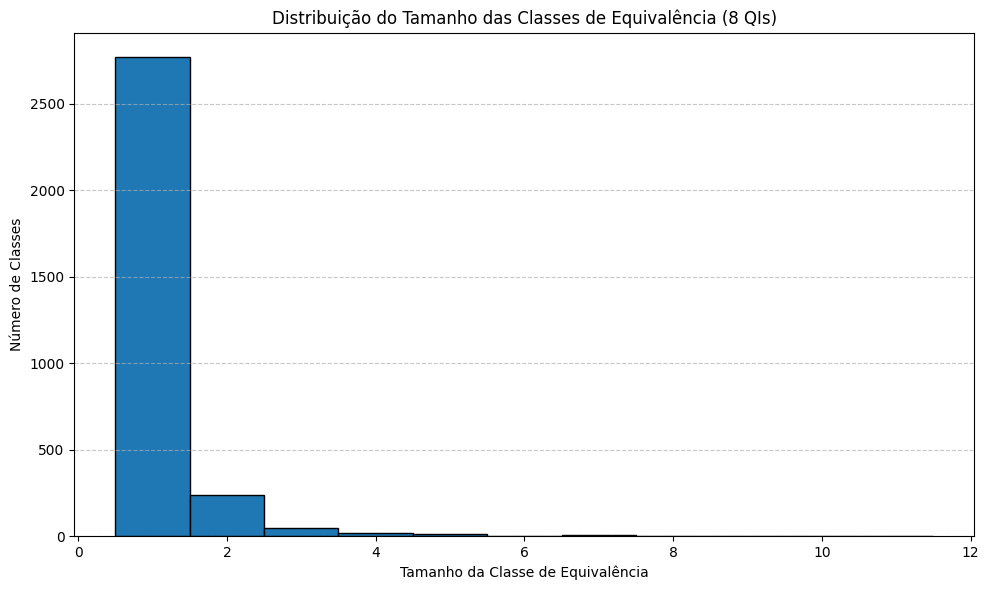

N√∫mero de classes de equival√™ncia com tamanho 1: 2770
N√∫mero de classes de equival√™ncia com tamanho 2: 236
N√∫mero de classes de equival√™ncia com tamanho 3: 50
Total de classes de equival√™ncia: 3103


In [32]:
quasi_identifiers = [
    '1.i.1_uf_onde_mora',
    # '2.i_tempo_de_experiencia_em_dados',
    # '2.j_tempo_de_experiencia_em_ti',
    '1.l_nivel_de_ensino',
    '1.m_√°rea_de_forma√ß√£o',
    '2.b_setor',
    '2.c_numero_de_funcionarios',
    '2.f_cargo_atual'
]

grupos = df.groupby(quasi_identifiers).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
plt.hist(grupos['count'], bins=range(1, grupos['count'].max() + 2), edgecolor='black', align='left')
plt.title('Distribui√ß√£o do Tamanho das Classes de Equival√™ncia (8 QIs)')
plt.xlabel('Tamanho da Classe de Equival√™ncia')
plt.ylabel('N√∫mero de Classes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

num_grupos_tam_1 = (grupos['count'] == 1).sum()
num_grupos_tam_2 = (grupos['count'] == 2).sum()
num_grupos_tam_3 = (grupos['count'] == 3).sum()
total_grupos = len(grupos)
print(f'N√∫mero de classes de equival√™ncia com tamanho 1: {num_grupos_tam_1}')
print(f'N√∫mero de classes de equival√™ncia com tamanho 2: {num_grupos_tam_2}')
print(f'N√∫mero de classes de equival√™ncia com tamanho 3: {num_grupos_tam_3}')
print(f'Total de classes de equival√™ncia: {total_grupos}')

Ao remover os dois quasi-identificadores (`tempo de experi√™ncia em dados` e `tempo de experi√™ncia em TI`), ainda assim observamos um risco relevante de reidentifica√ß√£o:

* **2.270 classes de equival√™ncia t√™m tamanho 1**, ou seja, 2.270 indiv√≠duos ainda podem ser identificados unicamente.
* Outras **236 classes t√™m tamanho 2**, o que significa que, ao observar algu√©m com essas caracter√≠sticas no LinkedIn, temos **50% de chance** de acertar qual indiv√≠duo √© aquele no dataset.

Portanto, mesmo **sem os dois atributos menos confi√°veis**, a estrutura do dataset j√° permite um grau preocupante de reidentifica√ß√£o. Com os oito quasi-identificadores, o potencial de identificar pessoas com precis√£o √© ainda mais elevado.

In [34]:
quasi_identifiers = [
    '1.i.1_uf_onde_mora',
    '2.f_cargo_atual',
    '1.l_nivel_de_ensino',
    '1.m_√°rea_de_forma√ß√£o',
    '2.i_tempo_de_experiencia_em_dados',
    '2.j_tempo_de_experiencia_em_ti',
    '2.b_setor',
    '2.c_numero_de_funcionarios',
]

def analisar_distribuicoes(df, quasi_identifiers):
    estatisticas = []

    for r in range(1, len(quasi_identifiers) + 1):
        for combinacao in itertools.combinations(quasi_identifiers, r):
            grupos = df.groupby(list(combinacao)).size()
            counts = grupos.value_counts().sort_index()

            total_grupos = len(grupos)
            grupos_tam_1 = (grupos == 1).sum()
            min_tam = grupos.min()
            max_tam = grupos.max()
            media_tam = grupos.mean()

            estatisticas.append({
                'num_qi': r,
                'combinacao': combinacao,
                'total_grupos': total_grupos,
                'grupos_tamanho_1': grupos_tam_1,
                'proporcao_tam_1': grupos_tam_1 / total_grupos,
                'min_tamanho': min_tam,
                'max_tamanho': max_tam,
                'media_tamanho': media_tam
            })

    return pd.DataFrame(estatisticas)

estatisticas_df = analisar_distribuicoes(df, quasi_identifiers)


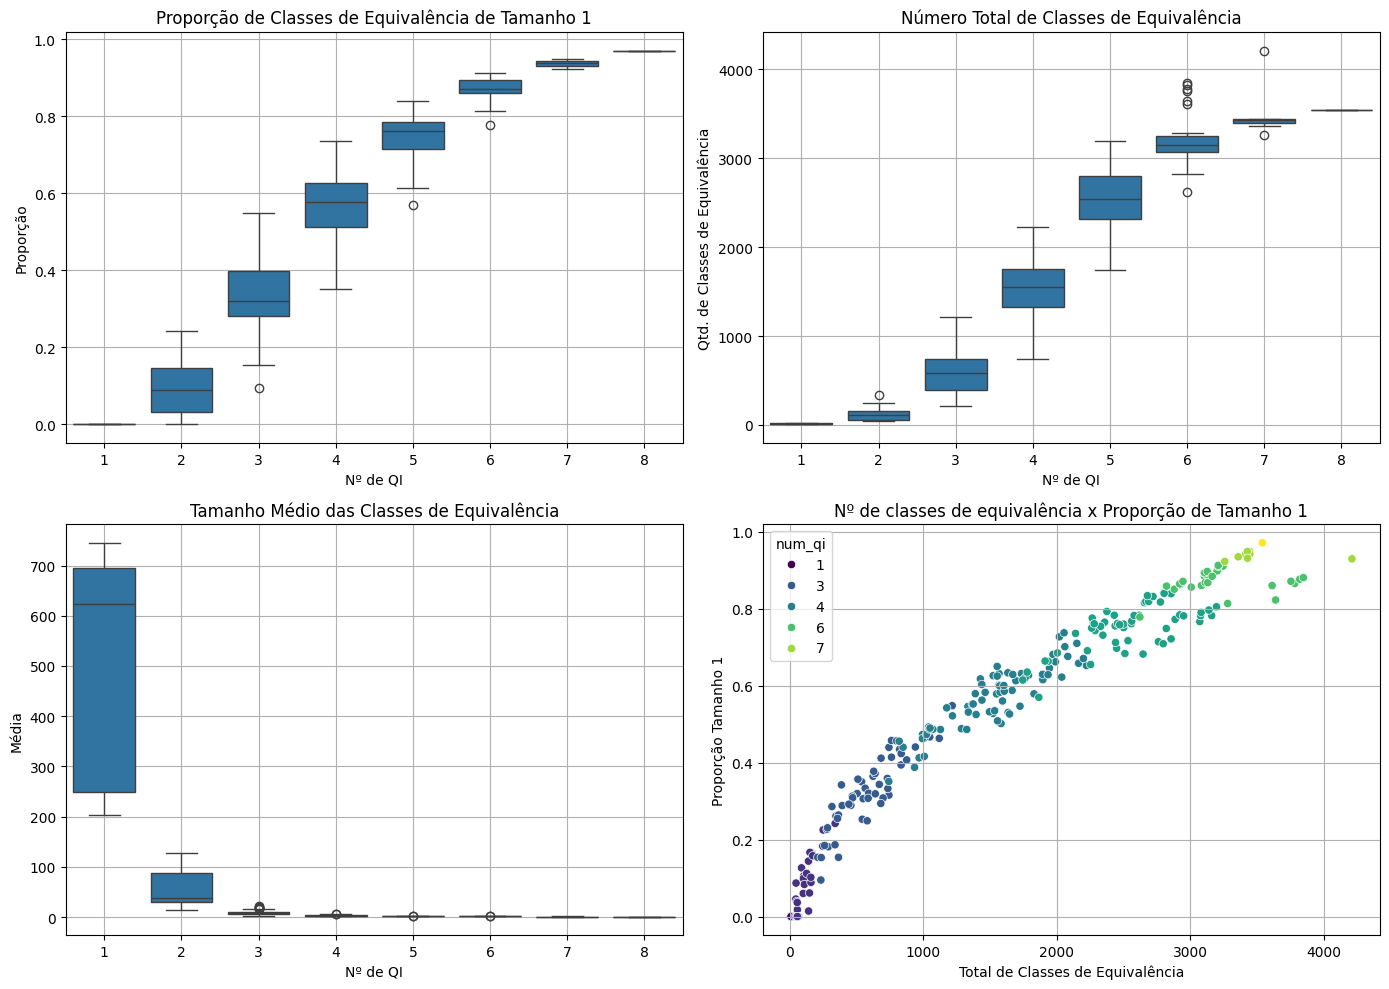

In [47]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='num_qi', y='proporcao_tam_1', data=estatisticas_df)
plt.title('Propor√ß√£o de Classes de Equival√™ncia de Tamanho 1')
plt.xlabel('N¬∫ de QI')
plt.ylabel('Propor√ß√£o')
plt.grid(True)

plt.subplot(2, 2, 2)
sns.boxplot(x='num_qi', y='total_grupos', data=estatisticas_df)
plt.title('N√∫mero Total de Classes de Equival√™ncia')
plt.xlabel('N¬∫ de QI')
plt.ylabel('Qtd. de Classes de Equival√™ncia')
plt.grid(True)

plt.subplot(2, 2, 3)
sns.boxplot(x='num_qi', y='media_tamanho', data=estatisticas_df)
plt.title('Tamanho M√©dio das Classes de Equival√™ncia')
plt.xlabel('N¬∫ de QI')
plt.ylabel('M√©dia')
plt.grid(True)

plt.subplot(2, 2, 4)
sns.scatterplot(x='total_grupos', y='proporcao_tam_1', hue='num_qi', data=estatisticas_df, palette='viridis')
plt.title('N¬∫ de classes de equival√™ncia x Propor√ß√£o de Tamanho 1')
plt.xlabel('Total de Classes de Equival√™ncia')
plt.ylabel('Propor√ß√£o Tamanho 1')
plt.grid(True)

plt.tight_layout()
plt.show()


In [42]:
linha_max = estatisticas_df.loc[estatisticas_df['proporcao_tam_1'].idxmax()]

print("N√∫mero de quasi-identificadores:", linha_max['num_qi'])
print("Combina√ß√£o respons√°vel:", linha_max['combinacao'])
print("Total de grupos (classes de equival√™ncia):", linha_max['total_grupos'])
print("Grupos com tamanho 1:", linha_max['grupos_tamanho_1'])
print("Propor√ß√£o de grupos com tamanho 1:", f"{linha_max['proporcao_tam_1']:.2%}")
print("Tamanho m√≠nimo de grupo:", linha_max['min_tamanho'])
print("Tamanho m√°ximo de grupo:", linha_max['max_tamanho'])
print("Tamanho m√©dio dos grupos:", f"{linha_max['media_tamanho']:.2f}")

N√∫mero de quasi-identificadores: 8
Combina√ß√£o respons√°vel: ('1.i.1_uf_onde_mora', '2.f_cargo_atual', '1.l_nivel_de_ensino', '1.m_√°rea_de_forma√ß√£o', '2.i_tempo_de_experiencia_em_dados', '2.j_tempo_de_experiencia_em_ti', '2.b_setor', '2.c_numero_de_funcionarios')
Total de grupos (classes de equival√™ncia): 3540
Grupos com tamanho 1: 3437
Propor√ß√£o de grupos com tamanho 1: 97.09%
Tamanho m√≠nimo de grupo: 1
Tamanho m√°ximo de grupo: 4
Tamanho m√©dio dos grupos: 1.03


In [43]:
linha_max = estatisticas_df.loc[estatisticas_df['total_grupos'].idxmax()]

print("N√∫mero de quasi-identificadores:", linha_max['num_qi'])
print("Combina√ß√£o respons√°vel:", linha_max['combinacao'])
print("Total de grupos (classes de equival√™ncia):", linha_max['total_grupos'])
print("Grupos com tamanho 1:", linha_max['grupos_tamanho_1'])
print("Propor√ß√£o de grupos com tamanho 1:", f"{linha_max['proporcao_tam_1']:.2%}")
print("Tamanho m√≠nimo de grupo:", linha_max['min_tamanho'])
print("Tamanho m√°ximo de grupo:", linha_max['max_tamanho'])
print("Tamanho m√©dio dos grupos:", f"{linha_max['media_tamanho']:.2f}")

N√∫mero de quasi-identificadores: 7
Combina√ß√£o respons√°vel: ('1.i.1_uf_onde_mora', '1.l_nivel_de_ensino', '1.m_√°rea_de_forma√ß√£o', '2.i_tempo_de_experiencia_em_dados', '2.j_tempo_de_experiencia_em_ti', '2.b_setor', '2.c_numero_de_funcionarios')
Total de grupos (classes de equival√™ncia): 4211
Grupos com tamanho 1: 3913
Propor√ß√£o de grupos com tamanho 1: 92.92%
Tamanho m√≠nimo de grupo: 1
Tamanho m√°ximo de grupo: 10
Tamanho m√©dio dos grupos: 1.11


1. **Identificabilidade elevada**:
   Ao usar os 8 quase-identificadores, mais de **97%** das classes de equival√™ncia t√™m tamanho 1, evidenciando forte capacidade de reidentifica√ß√£o.

2. **Com apenas 6 QIs ainda √© elevado**:
   A partir de 6 quase-identificadores, a **propor√ß√£o de grupos de tamanho 1 ultrapassa 80%**, indicando que **nem todos os QIs s√£o necess√°rios** para atingir esse grau de granularidade.

3. **Queda da m√©dia √© esperada**:
   A m√©dia do tamanho dos grupos cai rapidamente ‚Äî o que √© esperado, j√° que a fragmenta√ß√£o cria muitos grupos de tamanho 1, e poucos grandes.

4. **Ponto √≥timo (linha de domin√¢ncia de Pareto)**:
   H√° um ponto destacado no gr√°fico, que **usa apenas 7 QIs** (todos exceto `cargo_atual`), que tem **mais de 4.000 grupos √∫nicos e alta propor√ß√£o de tamanho 1**.
   Esse ponto est√° na **fronteira de Pareto** (n√£o √© dominado em nenhuma dimens√£o: nem em n√∫mero de grupos nem em propor√ß√£o).

### Atribui√ß√£o de pesos e constru√ß√£o do score de confian√ßa

Para refinar nossa an√°lise sobre o potencial de reidentifica√ß√£o, atribu√≠mos pesos a cada quasi-identificador com base no grau de confian√ßa que temos nas informa√ß√µes extra√≠das dos perfis. Esses pesos n√£o refletem certeza absoluta, mas sim uma **rela√ß√£o comparativa entre os atributos** ‚Äî ou seja, at√© que ponto confiamos que o valor extra√≠do representa corretamente a realidade daquela pessoa.

As justificativas para os pesos atribu√≠dos s√£o:

- **UF onde mora** (`1.i.1_uf_onde_mora`) ‚Äî **10**: √© uma informa√ß√£o geralmente expl√≠cita no perfil e f√°cil de inferir, al√©m de ser relativamente est√°vel.
- **Setor da empresa** (`2.b_setor`) ‚Äî **10**: geralmente pode ser deduzido com alto grau de precis√£o a partir da descri√ß√£o da empresa.
- **Cargo atual** (`2.f_cargo_atual`) ‚Äî **9**: √© uma informa√ß√£o confi√°vel e bem delimitada, mas pode ter varia√ß√µes sutis de nomenclatura.
- **N√≠vel de ensino** (`1.l_nivel_de_ensino`) ‚Äî **9**: costuma estar claro no perfil, mas pode haver d√∫vidas entre gradua√ß√£o e p√≥s-gradua√ß√£o, por exemplo.
- **√Årea de forma√ß√£o** (`1.m_√°rea_de_forma√ß√£o`) ‚Äî **8**: h√° mais ambiguidade, pois o perfil pode destacar diferentes forma√ß√µes (ex: gradua√ß√£o vs p√≥s).
- **N√∫mero de funcion√°rios da empresa** (`2.c_numero_de_funcionarios`) ‚Äî **8**: essa informa√ß√£o pode estar desatualizada ou ser apenas uma estimativa.
- **Tempo de experi√™ncia em dados** (`2.i_tempo_de_experiencia_em_dados`) ‚Äî **6**: envolve interpreta√ß√£o e infer√™ncia, o que reduz a confian√ßa.
- **Tempo de experi√™ncia em TI** (`2.j_tempo_de_experiencia_em_ti`) ‚Äî **6**: assim como o item anterior, depende de uma leitura mais subjetiva.

Com esses valores, atribu√≠mos um **grau de confian√ßa para cada combina√ß√£o de quasi-identificadores**, calculado como a m√©dia dos pesos dos identificadores presentes naquela combina√ß√£o. Esse grau de confian√ßa foi utilizado posteriormente como um dos fatores para compor o *score final* de cada combina√ß√£o, ponderando a capacidade de reidentifica√ß√£o pela confian√ßa nos dados.


In [ ]:
pesos_qi = {
    '1.i.1_uf_onde_mora': 10,
    '2.b_setor': 10,
    '2.f_cargo_atual': 9,
    '1.l_nivel_de_ensino': 9,
    '1.m_√°rea_de_forma√ß√£o': 8,
    '2.c_numero_de_funcionarios': 8,
    '2.i_tempo_de_experiencia_em_dados': 6,
    '2.j_tempo_de_experiencia_em_ti': 6,
}

def calcular_confianca(combinacao):
    return sum(pesos_qi[qi] for qi in combinacao) / len(combinacao)

estatisticas_df['confianca'] = estatisticas_df['combinacao'].apply(calcular_confianca)

### C√°lculo do score final de cada combina√ß√£o

Para comparar diferentes combina√ß√µes de quasi-identificadores considerando tanto a capacidade de reidentifica√ß√£o quanto a confian√ßa nos dados, constru√≠mos um **score final ponderado**.

Esse score leva em conta duas dimens√µes principais:

1. **A m√©dia dos pesos dos quasi-identificadores** da combina√ß√£o (que representa nossa confian√ßa na acur√°cia dos dados extra√≠dos).
2. **A distribui√ß√£o dos tamanhos das classes de equival√™ncia**, onde penalizamos menos as classes menores (por exemplo, classes de tamanho 1 s√£o mais desej√°veis que classes de tamanho 4).

A f√≥rmula utilizada para o c√°lculo do score final √©:

$$
\text{score} = \bar{C} \cdot \sum_{x=1}^{N} \left( \frac{p_x}{x} \right)
$$

Onde:

- $\bar{C}$ √© a m√©dia dos pesos dos quasi-identificadores na combina√ß√£o.
- $p_x$ √© a propor√ß√£o de classes de equival√™ncia de tamanho $x$ (isto √©, quantos grupos de tamanho $x$ existem dividido pelo total de grupos).
- $x$ √© o tamanho da classe de equival√™ncia.
- $N$ √© o maior tamanho de grupo observado.

A ideia central dessa m√©trica √© que **classes menores representam maior potencial de reidentifica√ß√£o individual**. Ao dividir a propor√ß√£o de grupos por seu tamanho ($1/x$), estamos penalizando as classes maiores e valorizando aquelas que isolam mais facilmente os indiv√≠duos. Multiplicamos esse valor pela m√©dia de confian√ßa dos identificadores utilizados para balancear o ganho de granularidade com a confiabilidade da informa√ß√£o usada.

Essa abordagem nos permite encontrar combina√ß√µes que oferecem o **melhor equil√≠brio entre discriminatividade e confian√ßa nos dados**.


In [69]:
def calcular_score_final(combinacao):
    grupos = df.groupby(list(combinacao)).size()
    contagens = Counter(grupos)

    total_grupos = sum(contagens.values())
    score_ponderado = 0

    for tamanho, quantidade in contagens.items():
        proporcao = quantidade / total_grupos
        score_ponderado += proporcao / tamanho

    confianca_media = sum(pesos_qi[qi] for qi in combinacao) / len(combinacao)

    return confianca_media * score_ponderado

estatisticas_df['novo_score_final'] = [
    calcular_score_final(combinacao) for combinacao in estatisticas_df['combinacao']
]

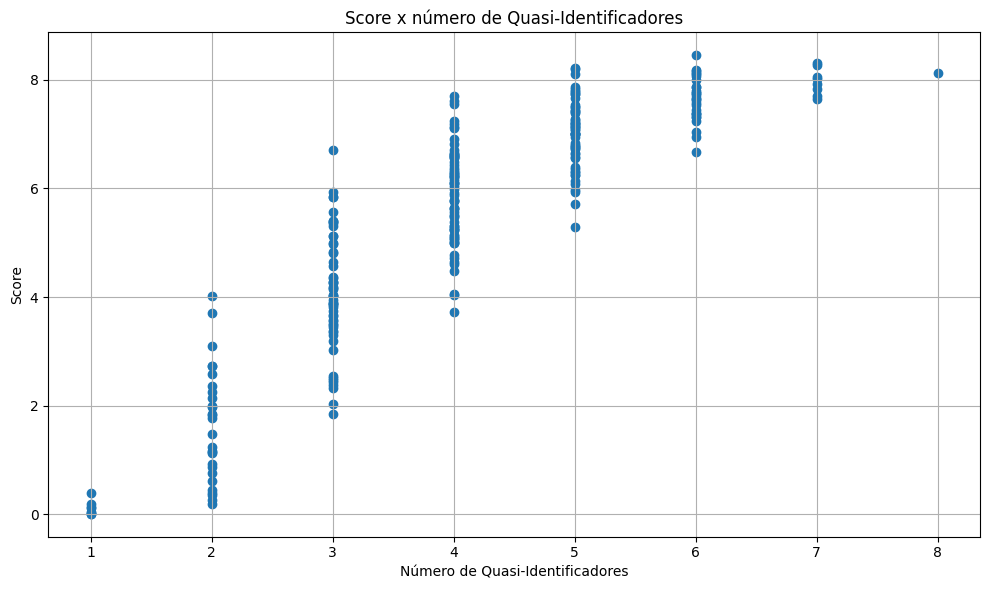

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(estatisticas_df['num_qi'], estatisticas_df['novo_score_final'])
plt.xlabel('N√∫mero de Quasi-Identificadores')
plt.ylabel('Score')
plt.title('Score x n√∫mero de Quasi-Identificadores')
plt.grid(True)
plt.tight_layout()
plt.show()

In [73]:
melhor = estatisticas_df.loc[estatisticas_df['novo_score_final'].idxmax()]

print("üîç Melhor combina√ß√£o (novo score refinado):")
print(f"QIs: {melhor['combinacao']}")
print(f"Score: {melhor['novo_score_final']:.4f}")
print(f"Total de grupos: {melhor['total_grupos']}")
print(f"Propor√ß√£o de grupos de tamanho 1: {melhor['proporcao_tam_1']:.2%}")
print(f"Confian√ßa m√©dia: {melhor['confianca']:.2f}")

üîç Melhor combina√ß√£o (novo score refinado):
QIs: ('1.i.1_uf_onde_mora', '2.f_cargo_atual', '1.l_nivel_de_ensino', '1.m_√°rea_de_forma√ß√£o', '2.b_setor', '2.c_numero_de_funcionarios')
Score: 8.4512
Total de grupos: 3103
Propor√ß√£o de grupos de tamanho 1: 89.27%
Confian√ßa m√©dia: 9.00


## Desanonimiza√ß√£o

In [118]:
quasi_identifiers = [
    '1.i.1_uf_onde_mora',
    '2.i_tempo_de_experiencia_em_dados',
    '2.j_tempo_de_experiencia_em_ti',
    '1.l_nivel_de_ensino',
    '1.m_√°rea_de_forma√ß√£o',
    # '2.b_setor',
    # '2.c_numero_de_funcionarios',
    '2.f_cargo_atual'
]

df_anon = pd.read_csv("state_of_the_data_dataset.csv")
df_ident = pd.read_csv("linkedin_profiles_data.csv")

grupos_anon = df_anon.groupby(quasi_identifiers).size().reset_index(name='k_frequencia')

grupos_anon = grupos_anon.sort_values(by='k_frequencia', ascending=True).reset_index(drop=True)

grupos_anon['id_classe_equivalencia'] = range(1, len(grupos_anon) + 1)

colunas_reordenadas = ['id_classe_equivalencia', 'k_frequencia'] + [col for col in grupos_anon.columns if col not in ['id_classe_equivalencia', 'k_frequencia']]
grupos_anon = grupos_anon[colunas_reordenadas]

grupos_anon.to_csv("classes_equivalencia.csv", index=False)

df_anon_com_id = df_anon.merge(grupos_anon, on=quasi_identifiers, how='left')
df_ident_com_id = df_ident.merge(grupos_anon, on=quasi_identifiers, how='left')


In [120]:
# Passo 1: Filtrar entradas anonimizadas com k == 1
ids_unicos = df_anon_com_id[df_anon_com_id['k_frequencia'] == 1]['id_classe_equivalencia'].unique()

# Passo 2: Filtrar entradas no df_ident que pertencem a essas classes
df_reidentificaveis = df_ident_com_id[df_ident_com_id['id_classe_equivalencia'].isin(ids_unicos)]

# Passo 3: Selecionar colunas relevantes
df_resultado = df_reidentificaveis[['nome', 'link_perfil', 'id_classe_equivalencia']].copy()

# (Opcional) Ordenar por id_classe_equivalencia para melhor leitura
df_resultado = df_resultado.sort_values(by='id_classe_equivalencia').reset_index(drop=True)

# Exportar se quiser
df_resultado.to_csv("possiveis_reidentificacoes.csv", index=False)
